## Stratified sampling

In [1]:
# here we do a full data science coding experiment, from dataset -> good model
import pandas as pd

df = pd.read_csv('ds_salaries.csv')
# 
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [2]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [3]:
from sklearn.model_selection import train_test_split

# train test split logic
# note that stratify=y 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.5,
                                                   stratify=y)

# we see our training set follows the same distribution
print(y_train.value_counts(normalize=True), '\n\n')

# we see our test set follows the same distribution
print(y_test.value_counts(normalize=True))


company_size
M    0.537954
L    0.326733
S    0.135314
Name: proportion, dtype: float64 


company_size
M    0.536184
L    0.325658
S    0.138158
Name: proportion, dtype: float64


In [4]:
# Compare with SRS
# train test split logic
from sklearn.model_selection import train_test_split

# note that stratify is left out in this one
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5)

print(y_train.value_counts(normalize=True), '\n\n')

print(y_test.value_counts(normalize=True))


company_size
M    0.528053
L    0.333333
S    0.138614
Name: proportion, dtype: float64 


company_size
M    0.546053
L    0.319079
S    0.134868
Name: proportion, dtype: float64


In [5]:
# let's see if stratified sampling actually 
# improves Matthews correlation coefficient score
from sklearn.preprocessing import LabelEncoder

# before we can do anything, we need a label encoder
# fit our label encoder on the original column
encoder = LabelEncoder().fit(df['company_size'])

# apply our encoder to our original column
df['company_size_encoded'] = encoder.transform(df['company_size'])


# we see no nulls, so we continue
print(f'Amount of NAs :\n\n{df.isna().sum()}')



Amount of NAs :

Unnamed: 0              0
work_year               0
experience_level        0
employment_type         0
job_title               0
salary                  0
salary_currency         0
salary_in_usd           0
employee_residence      0
remote_ratio            0
company_location        0
company_size            0
company_size_encoded    0
dtype: int64


In [6]:

# performing Stratified Sampling With Pandas and Numpy

import pandas as pd
import numpy as np

# lets say we wanted to shrink our data frame down to 125 rows, 
# with the same
# target class distribution

size = 125


# using groupby and some fancy logic

stratified = df.groupby('company_size_encoded', group_keys=False).apply(lambda x: x.sample(int(np.rint(size*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

# we can see that our sample is 125 rows, 
# while our distribution follows as close as possible

print(stratified.company_size_encoded.value_counts(normalize=True), f'\n\nlength of data {stratified.shape}')


company_size_encoded
1    0.536
0    0.328
2    0.136
Name: proportion, dtype: float64 

length of data (125, 13)


array([[<Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'salary_in_usd'}>]], dtype=object)

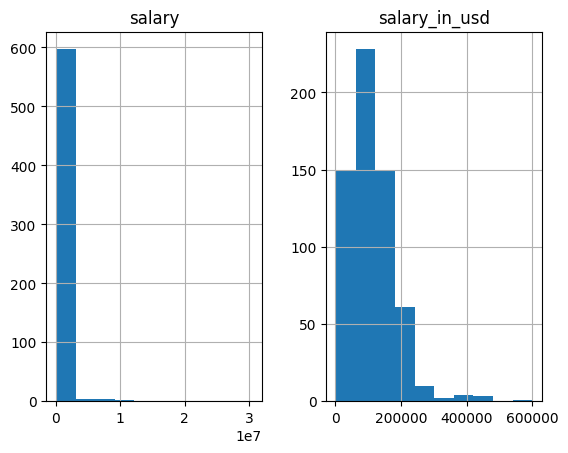

In [7]:

# normally here we would check the uniform distribution 
# of the target class in classification,
# but since we are using stratified sampling, we do not


# seperate our classes
X = df[[col for col in df.columns if (col != 'company_size') or\
        col != ('company_size_encoded')]]

# y value
y = df['company_size_encoded']


# let's drop our old categorical column that we have converted
X.drop(columns=['company_size','company_size_encoded','Unnamed: 0'], inplace=True)



# our categorical columns
categorical = ['work_year','experience_level','employment_type','salary_currency',
              'employee_residence','company_location','remote_ratio', 'job_title']

# our numerical values
numerical = [col for col in X.columns if col not in categorical]

# let's see how our numerical look
X[numerical].hist()

# yikes, salary is a little skewed, and salary has outliers

array([[<Axes: title={'center': 'salary_box_cox'}>,
        <Axes: title={'center': 'salary_in_usd_box_cox'}>]], dtype=object)

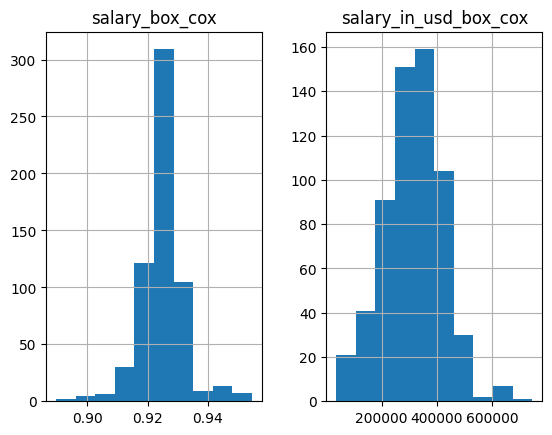

In [8]:

# lets fix the distribution of these to be normal
from scipy import stats

lambdas = []

for i,col in enumerate(numerical):
    if i == 0:
        R = X.copy()
    else:
        R = R.copy()
        
    R[col+'_box_cox'], L  = stats.boxcox((np.log(R[col])))
    lambdas.append((L,col,'+log'))
    
# improvements
R[['salary_box_cox','salary_in_usd_box_cox']].hist()



In [9]:
# almost there, just finalize the dataset
cata = pd.get_dummies(X,columns=categorical, drop_first=False)

cata['salary_in_usd_box_cox'] = R['salary_in_usd_box_cox']

cata.drop(columns=['salary','salary_in_usd'])

,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist,salary_in_usd_box_cox
0,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,282298.507798
1,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,508303.346029
2,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,331608.782411
3,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,130268.251078
4,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,389306.822476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,394416.152450
603,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,356826.985196
604,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,361074.171346
605,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,389306.822476


In [11]:
##### ******************* #############

# finally, let's test our stratify
# note, there is possible dataleakage from taking boxcoxs before splitting!!
# but to not make this very long, we will continue

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, roc_curve, matthews_corrcoef



#stratify test
accuracy_stratify = []

random_splits = [i for i in range(1,25,2)]

for each_random_split in random_splits:
    
    X_train, X_test, y_train, y_test = train_test_split(cata, y,\
                                                    test_size=0.10,\
                                                    random_state=each_random_split,\
                                                    stratify=y)
    
    print(f'Trainning Set: {len(X_train)}')
    
    clf = XGBClassifier()
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred),'\n')
    print(confusion_matrix(y_test, y_pred),'\n')
    
    print(matthews_corrcoef(y_test, y_pred))
    
    accuracy_stratify.append(matthews_corrcoef(y_test, y_pred))
    
    
#non-stratify test
accuracy_non_stratify = []

for each_random_split in random_splits:
    
    X_train, X_test, y_train, y_test = train_test_split(cata, y,\
                                                    test_size=0.10,\
                                                    random_state=each_random_split)
    
    print(f'Trainning Set: {len(X_train)}')
    
    clf = XGBClassifier()
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred),'\n')
    print(confusion_matrix(y_test, y_pred),'\n')
    
    print(matthews_corrcoef(y_test, y_pred))
    
    accuracy_non_stratify.append(matthews_corrcoef(y_test, y_pred))
    
# remember, we did a bunch of tests
# we will want the average from each
print(f'\n\nStratify {(sum(accuracy_stratify)/len(accuracy_stratify))} vs \
            Non-Stratify {sum(accuracy_non_stratify)/len(accuracy_non_stratify)}')

Trainning Set: 546
              precision    recall  f1-score   support

           0       0.48      0.75      0.59        20
           1       0.79      0.58      0.67        33
           2       0.33      0.25      0.29         8

    accuracy                           0.59        61
   macro avg       0.54      0.53      0.51        61
weighted avg       0.63      0.59      0.59        61
 

[[15  1  4]
 [14 19  0]
 [ 2  4  2]] 

0.3410601956771258
Trainning Set: 546
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        20
           1       0.74      0.85      0.79        33
           2       0.60      0.38      0.46         8

    accuracy                           0.67        61
   macro avg       0.63      0.57      0.59        61
weighted avg       0.66      0.67      0.66        61
 

[[10  9  1]
 [ 4 28  1]
 [ 4  1  3]] 

0.41428599925221
Trainning Set: 546
              precision    recall  f1-score   support

        